In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"C:\Users\fptshop\Dropbox\My PC (LAPTOP-PH3O06IJ)\Downloads\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes


Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [6]:
string_col=df.select_dtypes("string").columns.to_list()
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

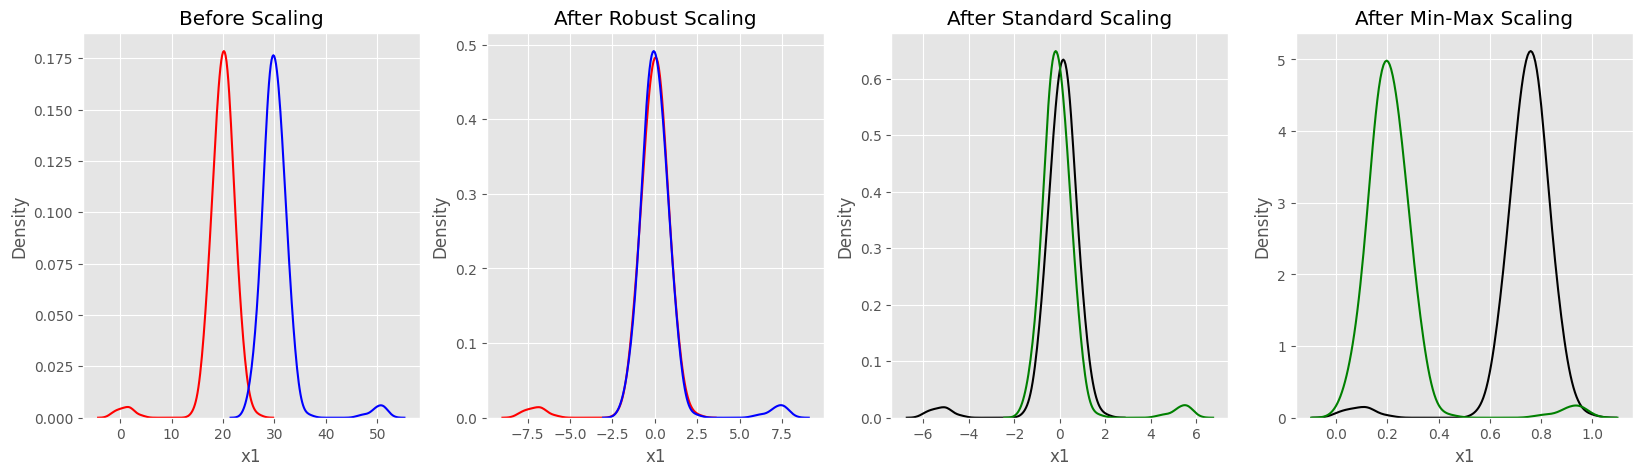

In [9]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [10]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [11]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [12]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [13]:
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


In [14]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [15]:
import numpy as np
import pandas as pd

# Load the dataset from the given file path
file_path = r"C:\Users\fptshop\Dropbox\My PC (LAPTOP-PH3O06IJ)\Downloads\heart.csv"
df_nontree = pd.read_csv(file_path)

# Print initial data summary
print("Initial Data Summary:")
print(df_nontree.info())
print(df_nontree.head())

# Define the target column and feature columns
target = 'HeartDisease'  # Ensure this is the correct column name
feature_col_nontree = df_nontree.columns[df_nontree.columns != target].tolist()

# Check for non-numeric columns
non_numeric_cols = df_nontree[feature_col_nontree].select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

# Encode non-numeric columns
df_nontree[non_numeric_cols] = df_nontree[non_numeric_cols].apply(lambda col: pd.factorize(col)[0])

# Check for missing values
print("Missing values in each column:")
print(df_nontree.isnull().sum())

# Handle missing values by dropping rows with any missing values
df_nontree.dropna(inplace=True)

# Verify the data after processing
print(f"Data shape after cleaning: {df_nontree.shape}")
print(df_nontree.head())

# Ensure all feature columns are numeric
df_nontree[feature_col_nontree] = df_nontree[feature_col_nontree].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values created by coercion
df_nontree.dropna(inplace=True)

# Verify the data again after processing
print(f"Data shape after second cleaning: {df_nontree.shape}")
print(df_nontree.head())

# Stratified K-Fold
def stratified_k_fold(X, y, n_splits=5):
    unique_classes, y_indices = np.unique(y, return_inverse=True)
    n_classes = len(unique_classes)
    y_counts = np.bincount(y_indices)
    y_folds = np.zeros_like(y_indices)

    for c in range(n_classes):
        y_c_indices = np.where(y_indices == c)[0]
        np.random.shuffle(y_c_indices)
        folds = np.array_split(y_c_indices, n_splits)
        for fold_idx, fold in enumerate(folds):
            y_folds[fold] = fold_idx

    indices = np.arange(len(y))
    for fold_idx in range(n_splits):
        train_indices = indices[y_folds != fold_idx]
        val_indices = indices[y_folds == fold_idx]
        yield train_indices, val_indices

# Min-Max Scaler
def min_max_scaler(X_train, X_valid):
    min_val = X_train.min(axis=0)
    max_val = X_train.max(axis=0)
    X_train_scaled = (X_train - min_val) / (max_val - min_val)
    X_valid_scaled = (X_valid - min_val) / (max_val - min_val)
    return X_train_scaled, X_valid_scaled

# Logistic Regression
class LogisticRegressionCustom:
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            if self.verbose and i % 1000 == 0:
                print(f'loss: {self.__loss(h, y)} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

# Evaluation Metrics
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    report = {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }
    return report

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def roc_auc_score(y_true, y_pred):
    # ROC AUC score for binary classification using trapezoidal rule
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    return auc(fpr, tpr)

# Main Cross-Validation Loop
acc_log = []

kf = stratified_k_fold(X=df_nontree[feature_col_nontree].values, y=df_nontree[target].values, n_splits=5)
for fold, (trn_, val_) in enumerate(kf):
    X_train = df_nontree.iloc[trn_][feature_col_nontree].values
    y_train = df_nontree.iloc[trn_][target].values
    
    X_valid = df_nontree.iloc[val_][feature_col_nontree].values
    y_valid = df_nontree.iloc[val_][target].values
    
    # Check if X_train or X_valid is empty
    if X_train.size == 0 or X_valid.size == 0:
        print(f"Fold {fold} resulted in empty train or validation set.")
        continue

    X_train, X_valid = min_max_scaler(X_train, X_valid)
    
    clf = LogisticRegressionCustom(lr=0.01, num_iter=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")

# Summary of results
print(f"Accuracies for all folds: {acc_log}")
print(f"Mean accuracy: {np.mean(acc_log)}")
print(f"Standard deviation of accuracies: {np.std(acc_log)}")


Initial Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F   

In [16]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    

The fold is : 0 : 
{'precision': 0.8421052631578947, 'recall': 0.6274509803921569, 'accuracy': 0.7282608695652174}
The accuracy for 1 : 0.7405547584887613
The fold is : 1 : 
{'precision': 0.868421052631579, 'recall': 0.6470588235294118, 'accuracy': 0.75}
The accuracy for 2 : 0.7625538020086082
The fold is : 2 : 
{'precision': 0.7580645161290323, 'recall': 0.9215686274509803, 'accuracy': 0.7934782608695652}
The accuracy for 3 : 0.7778574844571975
The fold is : 3 : 
{'precision': 0.77, 'recall': 0.7623762376237624, 'accuracy': 0.7431693989071039}
The accuracy for 4 : 0.7409442163728568
The fold is : 4 : 
{'precision': 0.7215189873417721, 'recall': 0.5643564356435643, 'accuracy': 0.639344262295082}
The accuracy for 5 : 0.6480318763583675


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hàm tính entropy
def entropy(y):
    elements, counts = np.unique(y, return_counts=True)
    entropy = 0
    for count in counts:
        p_i = count / len(y)
        entropy -= p_i * np.log2(p_i)
    return entropy

# Hàm tính toán thông tin
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for i in range(len(values)):
        subset_entropy = entropy(data[data[feature] == values[i]][target])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Hàm xây dựng cây quyết định
def build_tree(data, features, target):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    elif len(features) == 0:
        return data[target].mode()[0]
    else:
        best_feature = max(features, key=lambda feature: information_gain(data, feature, target))
        tree = {best_feature: {}}
        remaining_features = [feature for feature in features if feature != best_feature]
        for value in np.unique(data[best_feature]):
            subset = data[data[best_feature] == value]
            subtree = build_tree(subset, remaining_features, target)
            tree[best_feature][value] = subtree
        return tree

# Hàm dự đoán sử dụng cây quyết định
def predict(tree, sample):
    for node, subtree in tree.items():
        value = sample[node]
        if value in subtree:
            if isinstance(subtree[value], dict):
                return predict(subtree[value], sample)
            else:
                return subtree[value]
        else:
            return sample.mode()[0]

# Khởi tạo danh sách các chỉ số đánh giá
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Sử dụng Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5)

# Thực hiện Cross Validation
for fold, (train_index, val_index) in enumerate(kf.split(X=df_tree, y=df_tree[target]), 1):
    X_train, X_valid = df_tree.iloc[train_index], df_tree.iloc[val_index]
    y_train, y_valid = df_tree.iloc[train_index][target], df_tree.iloc[val_index][target]
    
    # Xây dựng cây quyết định
    decision_tree = build_tree(X_train, feature_col_tree, target)
    
    # Dự đoán trên tập kiểm tra
    y_pred = X_valid.apply(lambda x: predict(decision_tree, x), axis=1)
    
    # Đánh giá các chỉ số đánh giá
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average='weighted')
    recall = recall_score(y_valid, y_pred, average='weighted')
    f1 = f1_score(y_valid, y_pred, average='weighted')
    
    # Thêm vào danh sách
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # In ra kết quả
    print(f"The fold is : {fold} : ")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# In ra kết quả tổng thể
overall_accuracy = np.mean(accuracies)
overall_precision = np.mean(precisions)
overall_recall = np.mean(recalls)
overall_f1 = np.mean(f1_scores)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")


The fold is : 1 : 
Accuracy: 0.7500
Precision: 0.7559
Recall: 0.7500
F1 Score: 0.7507
The fold is : 2 : 
Accuracy: 0.6902
Precision: 0.6926
Recall: 0.6902
F1 Score: 0.6909
The fold is : 3 : 
Accuracy: 0.7283
Precision: 0.7405
Recall: 0.7283
F1 Score: 0.7212
The fold is : 4 : 
Accuracy: 0.6721
Precision: 0.6856
Recall: 0.6721
F1 Score: 0.6723
The fold is : 5 : 
Accuracy: 0.7049
Precision: 0.7245
Recall: 0.7049
F1 Score: 0.7043
Overall Accuracy: 0.7091
Overall Precision: 0.7198
Overall Recall: 0.7091
Overall F1 Score: 0.7079


In [19]:
import os 
os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\bin"
import graphviz
from sklearn import tree

# Assuming target is the name of the target column and class names need to be extracted from the data
class_names = df_tree[target].unique().astype(str).tolist()

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=class_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree")  # Save the graph to a file

'decision_tree.png'